In [9]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier



In [10]:
#Reading csv File

train_df = pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")



In [11]:
#Study columnwise data

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


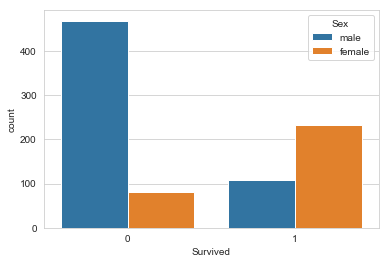

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex' , data = train_df)

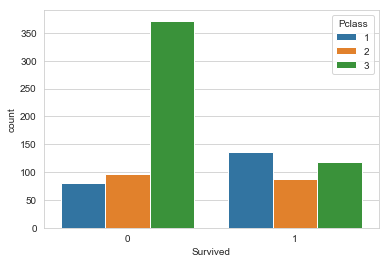

In [17]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


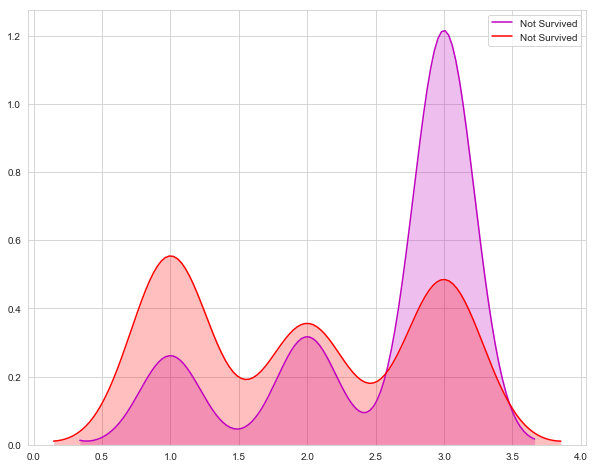

In [21]:
plt.subplots(figsize = (10,8))
sns.kdeplot(train_df.loc[train_df['Survived']==0,'Pclass'], shade=True,color='m',label='Not Survived')
ax = sns.kdeplot(train_df.loc[train_df['Survived']==1, 'Pclass'], shade = True, color = 'r', label = 'Not Survived')

labels = ['First', 'Second' , 'Third']
plt.xticks

In [22]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


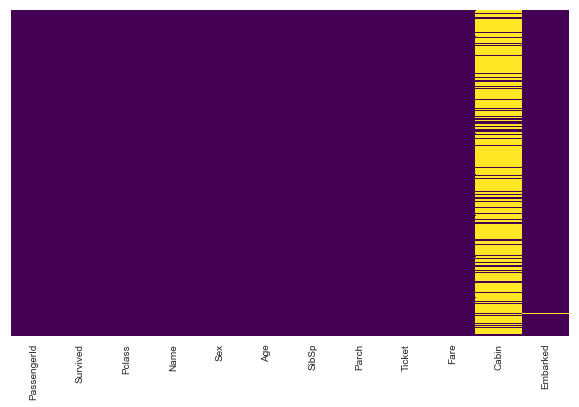

In [43]:
plt.figure(figsize = (10,6))
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [44]:

lst1=[]
lst2=[]
lst3=[]
n=len(train_df.Survived)
i=0
while i< n:
    if train_df['Pclass'][i]==1 and pd.isnull(train_df['Age'][i]) == False:
        lst1.append(train_df['Age'][i])
    elif train_df['Pclass'][i]==2  and pd.isnull(train_df['Age'][i]) == False:
        lst2.append(train_df['Age'][i])
    elif train_df['Pclass'][i]==3 and pd.isnull(train_df['Age'][i]) == False :
        lst3.append(train_df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [45]:
train_df.Age= train_df[['Age', 'Pclass']].apply(impute, axis=1)

In [47]:
train_df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})

Age                       
         min   max count       mean
Pclass                             
1       0.92  80.0   216  38.233441
2       0.67  70.0   184  29.877630
3       0.42  74.0   491  25.140620

In [49]:
train_df.drop('Cabin', inplace=True, axis=1)

In [51]:
train_df.dropna(inplace=True)

In [57]:
sex=pd.get_dummies(train_df.Sex, drop_first=True)

In [60]:
embark=pd.get_dummies(train_df.Embarked, drop_first=True)

In [62]:
train_df=pd.concat([train_df,sex,embark], axis=1)

In [63]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [65]:
train_df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp'], axis=1, inplace=True)

In [67]:
train_df.head()

,Survived,Pclass,Age,Parch,Fare,male,Q,S
0,0,3,22.0,0,7.2500,1,0,1
1,1,1,38.0,0,71.2833,0,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,0,53.1000,0,0,1
4,0,3,35.0,0,8.0500,1,0,1


In [69]:
train_df.corr()

,Survived,Pclass,Age,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.055278,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.400919,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.055278,-0.400919,1.000000,-0.174818,0.118050,0.085741,-0.069494,0.005249
Parch,0.083151,0.016824,-0.174818,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.118050,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.085741,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.069494,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.005249,0.061512,-0.163758,0.121405,-0.499261,1.000000


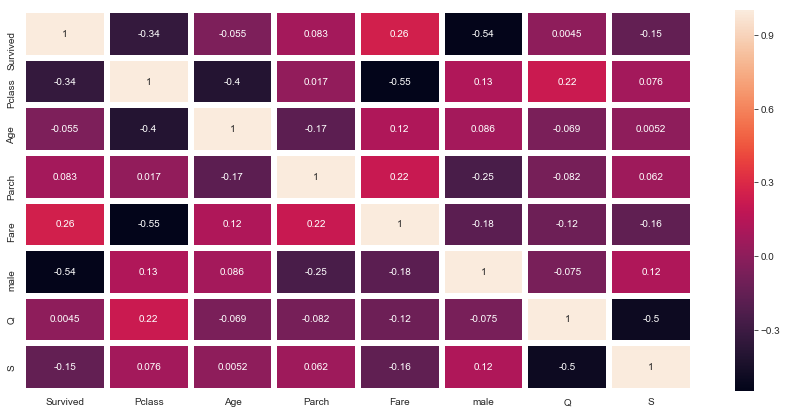

In [71]:
plt.figure(figsize=(15,7))
sns.heatmap(train_df.corr(),linewidths=5, annot=True)


In [72]:
X=train_df.drop('Survived', axis=1)
y=train_df.Survived

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
y_pred=kNN.predict(X_test)

In [80]:
knn_accy = round(accuracy_score(y_test, y_pred), 3)
print (knn_accy)
print(confusion_matrix(y_test,y_pred))

print('Test Accuracy for KNearest Neighbours: ', knn_accy)

0.707
[[150  34]
 [ 52  58]]
Test Accuracy for KNearest Neighbours:  0.707
